This notebook is interactive so please read and apply fundamentals, Do not run for coding, its just tool. Your understanding is important. Here, I will present my understanding with basic references. For, any confusion please contact me on 'vedantdave77@gmail.com'. For better understanding please use right side of tab to search. The world of data science believes in open source system. You will definately get the answer.

## What is CIFAR-10?
CIFAR-10 dataset is welknown public dataset with 60,000 images of 10 different classes. All those 10 classes consists ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'] labeled images. Today I represents my best approach to create model for CIFAR-10. I will use PyTorch to train modle and also give full understanding of MLP approach. so, please keep attension to every detail. If you have any confusion then connect with me, we will discuss it further. For more detail you should use right side of tab to search answer in opensource. Thank you. So, Let's Start.

## Test Cuda availability 


In [1]:
import torch
import numpy as np 

# check cuda 
train_on_cuda  = torch.cuda.is_available()

if not train_on_cuda:
  print('cuda is not available')
else:
  print('cuda ia available, Yahoo!!!')


cuda ia available, Yahoo!!!


### Load data
- We will load dataset with specific batch size and our batch size depends up on the RAM of our system. If we have powerful processor with good memory then it can run more batch_images at a time. That means if you have more powerful processor with high enough memory then you can increase batch_size up to total image number.
- Now, important here is according to batch_size our network will train our network with first 20 images at a time and then repeat the preocess for anther one up to total image samples(input).
- Validation is 0.2 means 80% of images for trainset (here, form 50,000 trainset, 10,000 are for validation set. and another 10,000 are reserved for test set. (Validation set give extra power to network to adjust it self to max training accuracy with hyper parameter tuning with out overfiting or underfit to the model. 
- AS an example, from training and validation accuracy we can adjust our hyper parameter in such way that will increase both accuracy so, it will not biased to poor datapoints. (so, its not main solution of reducing overfiting but help to identify network good enough that will consider all charactaristic data points, so model can increase its confidence level.

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

num_workers = 0  # no of subprocesses to using data
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


In [3]:
train_data = datasets.CIFAR10('data',train = True, download = True,transform = transform)
test_data = datasets.CIFAR10('data',train = False, download= True,transform=transform)

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Why Shuffling of data?
- Here, before validation we will shuffle all the data points so it will become random in nature so, train and validation both maximise the probability of shared region datapoints.(...means datapoints from every region... reduce chance of outliers) 

In [0]:
# indices for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx,valid_idx = indices[split:],indices[:split]


In [0]:
# data loader
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,batch_size= batch_size,
                                           sampler = train_sampler, num_workers= num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size,
                                           sampler = valid_sampler, num_workers= num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,
                                          num_workers=num_workers)
                                           


CIFAR-10 has folling type of images and we need to classify them with high accuracy. 

In [0]:
# classes define 
classes = ['airplane','automobile','bird','cat','deer','dog','frog',
           'horse','ship','truck']

### Visulize a barch of training data
- This will give us opportunity to observe our shuffle data nature and charactaristics.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
  img= img/ 2 +0.5
  plt.imshow(np.transpose(img,(1,2,0)))
  


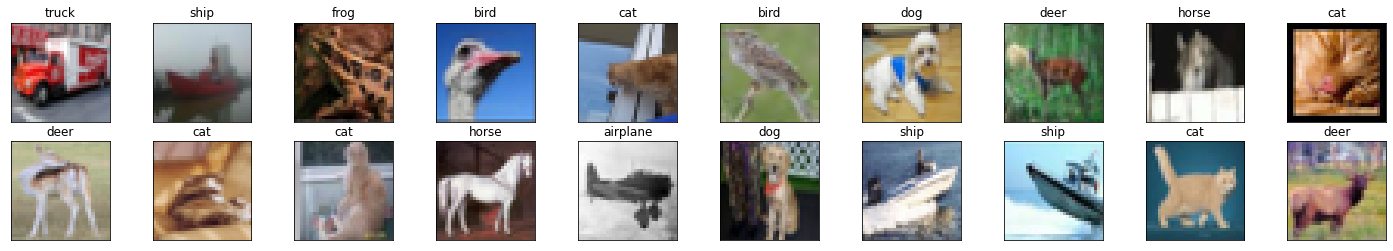

In [12]:
# now take bunch of data and use above defination for show training data
dataiter = iter(train_loader)
images,labels = dataiter.next()
images= images.numpy() # convert image to numpy for display

fig = plt.figure(figsize= (25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,20/2,idx+1,xticks = [], yticks= [])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])


# view images in more detail

*   All the images are with 32x32 pixelsand each have 3 color channels and as we know all of them can be represnt as 3 different matrix value So, let's take one individual image and indetify it as all three color channel.
*   Higher value shows the presence of color pixel in image. (each have value between 0 to 255, but here we use normalization by 255 so each value is not between 0.00 to 1.)



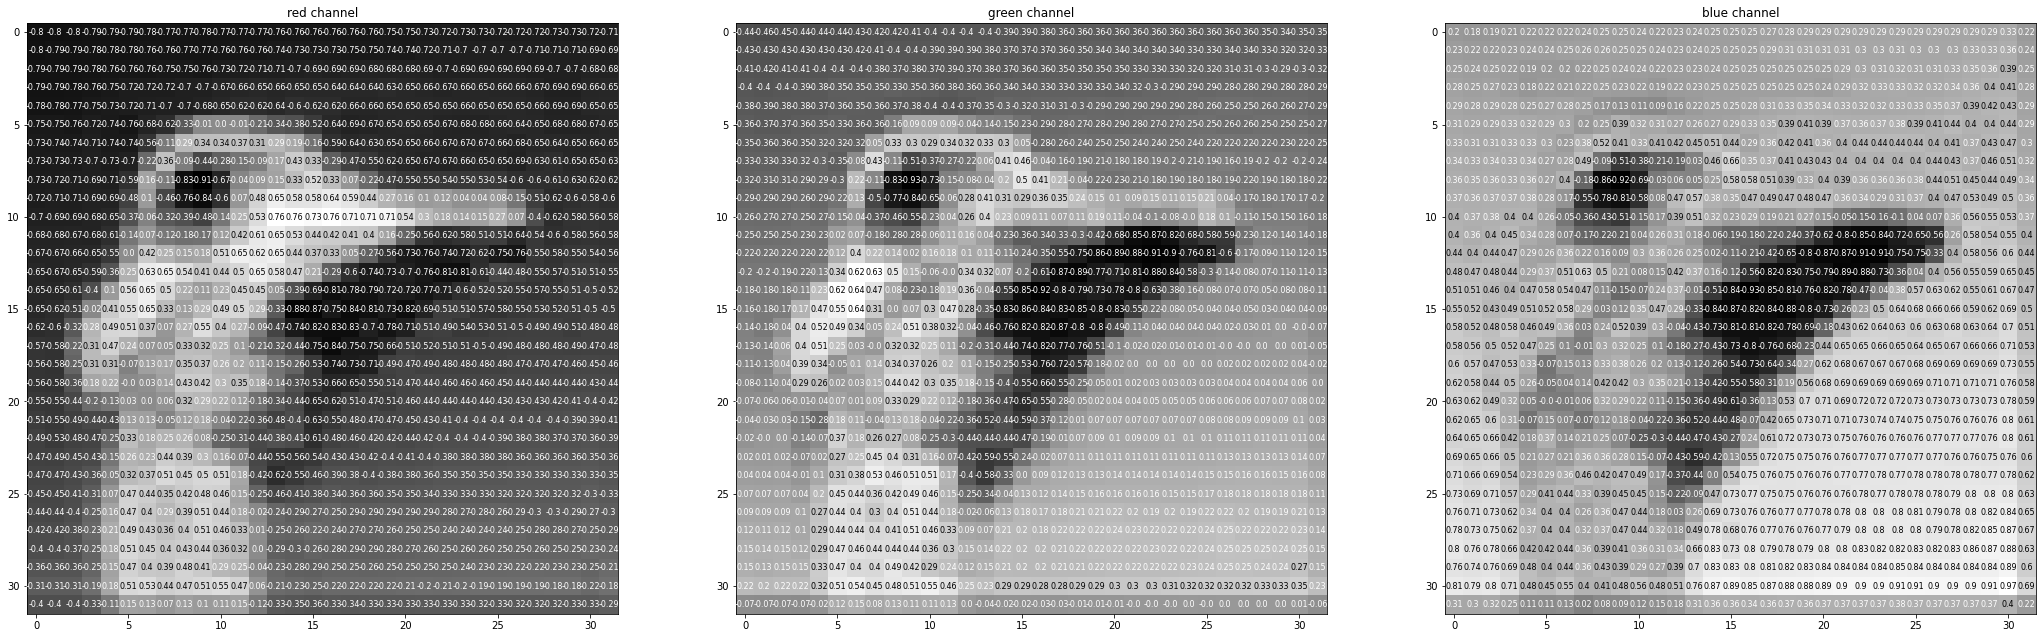

In [13]:
# seperate red, green and blue color channel as separate , graysclae intansity images
rgb_image = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig =plt.figure(figsize = (36,36))
for idx in np.arange(rgb_image.shape[0]):
  ax = fig.add_subplot(1,3,idx+1)
  img = rgb_image[idx]
  ax.imshow(img,cmap = 'gray')
  ax.set_title(channels[idx])
  width,height = img.shape
  thresh  = img.max()/2.5
  for x in range(width):
    for y in range(height):
      val = round(img[x][y],2) if img[x][y]!= 0 else 0
      ax.annotate(str(val),xy = (y,x),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 8,
                  color = 'white' if img[x][y] <thresh else 'black')


# Define Network Architecture.

### Here, we will use CNN instead of MLP approach, and will use PyTorch library. Now, as we know from theory, CNN have three type of layers. (1) convolution layers, (2) Maxpooling layer, (3) Fullly connected layer.

#### We will use linear + drop out layer for reduce the overfitting and in last stage it produce 10 dimension output.(Why? because we need to identify image from 10 major classes.)

### **Let's discuss CNN further in depth:**

- Its best time to discuss convolution layer. According to my understaning in convolution layer we mostly extract the features. As an example, " If we have deer then first some layer just detect its edges, legs, ear edges, then second and third layer will extract the obeject such as ear, nose, eyes, mouth from face (why? ... becuase actual size of layer is increased so, it can extract the pattern) 
- With all deer such extracted patterns are same, and such patterns will match with eachother with max likelyhood. And during training we also give labels, that will match such specific pattern with labels. So, during test if deer image same kind of pattern will be identified and we will achieve the output with max likelyhood.
- Max pooling layers are just to reduce the network size to run process faster and just take important information in such way so we will not loose essence of image (main relative information). 
- fully connected layers are for identifying differnt pattern in image to observe image deeply to identify complex images easily. (So, how to understand?... Well, nothing complex, think it as no. of channels. If we have three color channels then depth of one image becomes 3. Right!, Why we use three channels?, because we need to identify three colors. But, what if we have more thing to identify such as no of color channels, changing of contrast, angle of shapes, type of shape such as eyes are oval, mouth and nose are curved with more contrast. then we need more filters, means more depth means such network is to identifying details. [ Well, take this just to understand(fully connected).concepts]. In this way this network will work.

Here, we use **dropout technique** for regularize network. It helps to reduce overfiting. (How? ... Each time of iteration, model will not consider some neurons radomly so such datapoints will not considered by network will give special freedom that, Network adjust itself to more generalize. (consider average line of all time will fits models in such way so it maintain balance between training accuracy and test accuracy.) 

In [15]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3,padding = 1)
        self.conv2 = nn.Conv2d(16,32,3,padding = 1)
        self.conv3 = nn.Conv2d(32,64,3,padding = 1)

        #pooling layers
        self.pool = nn.MaxPool2d(2,2)
        #Linear layers
        self.fc1 = nn.Linear(64*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
        #drop_out
        self.dropout = nn.Dropout(0.25)
      
    def forward(self, x):
        # add sequence of conv. and max.pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #flatten image
        x = x.view(-1,64*4*4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = Net()
print(model)

if train_on_cuda:
  model.cuda()




Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


### Specify loss function and optimizer
- Loss function give us probability based result to identify maximum likelyhood to output. 
- Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

- How you should change your weights or learning rates of your neural network to reduce the losses is defined by the optimizers you use

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)


# Train network
- Here, as previous notebook, I do the same process to maintain the flow for output. Consider n_epoches = 30 are not the exact answer. It is achieved by trial and error. So, always try your self for that. You may get better than this.

In [18]:
n_epoches = 30 
valid_loss_min = np.Inf  # for traching the validation loss

for epoch in range(1,n_epoches+1):
    train_loss = 0.0
    valid_loss = 0.0

    # train the model
    model.train()
    for data,target in train_loader:
      if train_on_cuda:
        data,target = data.cuda(),target.cuda()
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output,target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()*data.size(0)

    #validate the model
    model.eval()
    for data,target in valid_loader:
      if train_on_cuda:
        data,target= data.cuda(),target.cuda()
        output= model(data)
        loss = criterion(output,target)
        valid_loss +=loss.item()*data.size(0)
      
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    print('validation loss decresed ({:.6f} t0 {:.6f}). Saving model.no {}'
      .format(valid_loss_min,valid_loss,epoch))
    torch.save(model.state_dict(), 'model_cifar.pt')
    valid_loss_min = valid_loss


Epoch: 1 	Training Loss: 2.123052 	Validation Loss: 1.854690
validation loss decresed (inf t0 1.854690). Saving model.no 1
Epoch: 2 	Training Loss: 1.666476 	Validation Loss: 1.487654
validation loss decresed (1.854690 t0 1.487654). Saving model.no 2
Epoch: 3 	Training Loss: 1.468174 	Validation Loss: 1.410718
validation loss decresed (1.487654 t0 1.410718). Saving model.no 3
Epoch: 4 	Training Loss: 1.355304 	Validation Loss: 1.272329
validation loss decresed (1.410718 t0 1.272329). Saving model.no 4
Epoch: 5 	Training Loss: 1.264568 	Validation Loss: 1.216032
validation loss decresed (1.272329 t0 1.216032). Saving model.no 5
Epoch: 6 	Training Loss: 1.184045 	Validation Loss: 1.108570
validation loss decresed (1.216032 t0 1.108570). Saving model.no 6
Epoch: 7 	Training Loss: 1.114082 	Validation Loss: 1.043535
validation loss decresed (1.108570 t0 1.043535). Saving model.no 7
Epoch: 8 	Training Loss: 1.056226 	Validation Loss: 1.001877
validation loss decresed (1.043535 t0 1.001877).

### Load the model with the lowest validation loss
- '.pt' is extension used for pytorch model to save its state called pop!site (html) file. (when we have more test data and not in one batch or not possible to test at one seating, or you do not want to seat against computer during training time, then its better to give command fo saving a model. It will save model state and give us levearage to use it whenever required.
- If you are using anaconda, then it will save to your lacol or cloud folder. In colab. when runtime will reset. It will remove your '.pt' file it self. 

In [19]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

### Test train Network

In [20]:
test_loss = 0.0 # for tracking the test loss

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data,target in test_loader:
  if train_on_cuda:
    data,target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output,target)
    test_loss += loss.item()*data.size(0)

    _,pred = torch.max(output,1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct =np.squeeze(correct_tensor.numpy()) if not train_on_cuda else np.squeeze(correct_tensor.cpu().numpy())
  
  #calculate accuracy oftest for each object class
  for i in range(batch_size):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] +=1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('')
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.798556
Test Accuracy of airplane: 81% (813/1000)
Test Accuracy of automobile: 88% (881/1000)
Test Accuracy of  bird: 65% (651/1000)
Test Accuracy of   cat: 50% (500/1000)
Test Accuracy of  deer: 64% (644/1000)
Test Accuracy of   dog: 71% (719/1000)
Test Accuracy of  frog: 79% (796/1000)
Test Accuracy of horse: 82% (828/1000)
Test Accuracy of  ship: 79% (794/1000)
Test Accuracy of truck: 79% (795/1000)


Test Accuracy (Overall): 74% (7421/10000)


### Visualization of output. 

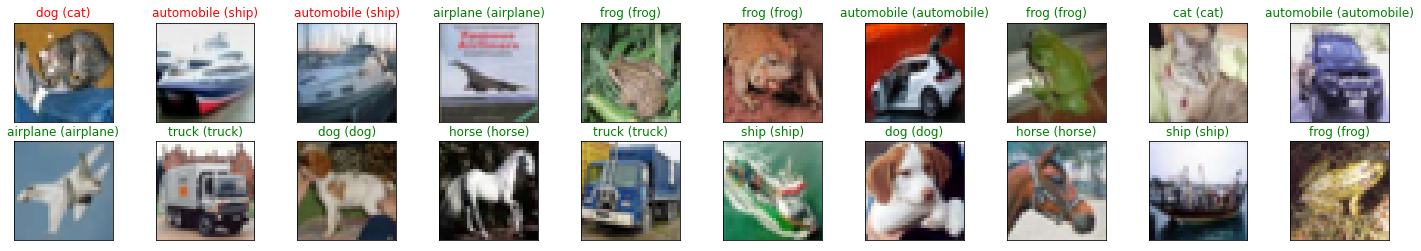

In [21]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_cuda:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_cuda else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [0]:
# Keep Learning, Enjoy Empowering